In [1]:
from keras.datasets import mnist
from matplotlib import pyplot
 
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
#shape of dataset
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))
 

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


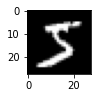

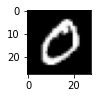

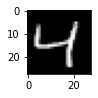

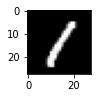

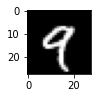

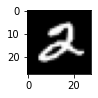

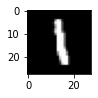

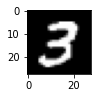

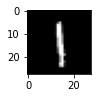

In [2]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'#needed to avoid "dead kernel"

#plotting some images (source: https://www.askpython.com/python/examples/load-and-plot-mnist-dataset-in-python)
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [3]:
# Baseline MLP for MNIST dataset 
#(source: https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 3s - loss: 0.2781 - accuracy: 0.9211 - val_loss: 0.1338 - val_accuracy: 0.9604
Epoch 2/10
300/300 - 2s - loss: 0.1111 - accuracy: 0.9677 - val_loss: 0.0996 - val_accuracy: 0.9690
Epoch 3/10
300/300 - 2s - loss: 0.0716 - accuracy: 0.9791 - val_loss: 0.0764 - val_accuracy: 0.9772
Epoch 4/10
300/300 - 2s - loss: 0.0495 - accuracy: 0.9854 - val_loss: 0.0683 - val_accuracy: 0.9790
Epoch 5/10
300/300 - 2s - loss: 0.0358 - accuracy: 0.9902 - val_loss: 0.0657 - val_accuracy: 0.9791
Epoch 6/10
300/300 - 2s - loss: 0.0266 - accuracy: 0.9928 - val_loss: 0.0645 - val_accuracy: 0.9801
Epoch 7/10
300/300 - 2s - loss: 0.0192 - accuracy: 0.9954 - val_loss: 0.0638 - val_accuracy: 0.9810
Epoch 8/10
300/300 - 2s - loss: 0.0143 - accuracy: 0.9966 - val_loss: 0.0543 - val_accuracy: 0.9815
Epoch 9/10
300/300 - 3s - loss: 0.0107 - accuracy: 0.9977 - val_loss: 0.0546 - val_accuracy: 0.9827
Epoch 10/10
300/300 - 3s - loss: 0.0079 - accuracy: 0.9987 - val_loss: 0.0586 - val_accuracy: 0.9816

In [4]:
#Predict a single MNIST image
from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#select an image
index = 91
test = X_train[index].reshape(num_pixels).astype('float32')
test = test/255
#Create a "1 item batch"
img = np.expand_dims(test,0)
predicted_number = model.predict(img)
np.argmax(predicted_number)

7

In [5]:
#Check the actual number
y_train[index]

7

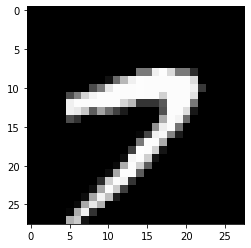

In [6]:
pyplot.imshow(X_train[index], cmap=pyplot.get_cmap('gray'))

In [8]:
#Predict an image loaded from the FS
#HP: the image is 28x28

from PIL import Image
number = Image.open("9.bmp")
number

In [9]:
input = np.asarray(number)#from image to array
input = input.astype(int)

new_numb = input.reshape(num_pixels).astype('float32')
myimg = np.expand_dims(new_numb,0) #Create a "1 item batch"

n= model.predict(myimg)
#Prediction
np.argmax(n)

8

In [10]:
# Simple CNN for the MNIST Dataset
#(source: https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [11]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define a simple CNN model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# build the model
model2 = baseline_model()
# Fit the model
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model2.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 8s 24ms/step - loss: 0.2374 - accuracy: 0.9316 - val_loss: 0.0734 - val_accuracy: 0.9772
Epoch 2/10
300/300 [==============================] - 7s 24ms/step - loss: 0.0729 - accuracy: 0.9783 - val_loss: 0.0529 - val_accuracy: 0.9839
Epoch 3/10
300/300 [==============================] - 8s 27ms/step - loss: 0.0521 - accuracy: 0.9840 - val_loss: 0.0434 - val_accuracy: 0.9855
Epoch 4/10
300/300 [==============================] - 9s 30ms/step - loss: 0.0411 - accuracy: 0.9872 - val_loss: 0.0425 - val_accuracy: 0.9858
Epoch 5/10
300/300 [==============================] - 9s 29ms/step - loss: 0.0330 - accuracy: 0.9898 - val_loss: 0.0426 - val_accuracy: 0.9861
Epoch 6/10
300/300 [==============================] - 9s 31ms/step - loss: 0.0277 - accuracy: 0.9915 - val_loss: 0.0360 - val_accuracy: 0.9874
Epoch 7/10
300/300 [==============================] - 9s 30ms/step - loss: 0.0237 - accuracy: 0.9922 - val_loss: 0.0370 - val_accuracy: 0.9876

In [12]:
#Predict a single MNIST image
from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np


# reload data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#select an image
index = 1000
test = X_train[index].reshape(1,28,28,1).astype('float32')
test = test/255

In [13]:
predicted_number = model2.predict(test)
np.argmax(predicted_number)

0

In [14]:
#Check the actual number
y_train[index]

0

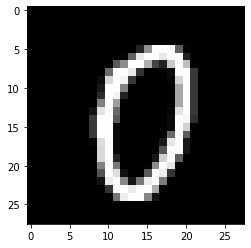

In [15]:
pyplot.imshow(X_train[index], cmap=pyplot.get_cmap('gray'))

In [16]:
#Predict an image loaded from the FS
#HP: the image is 28x28
from PIL import Image
import numpy as np

number = Image.open("9.bmp")
number

In [17]:
input = np.asarray(number)
input = input.astype(int)

img2 = input.reshape(1,28,28,1).astype('float32')

n= model2.predict(img2)
np.argmax(n)

8